In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import swiss_roll_dataset_generator as roll_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle

In [3]:
figure_num = 20**2
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
seed = 123
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed=seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_generator.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)


In [4]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) May 07 01:17:42 PM: Your problem has 160000 variables, 2024 constraints, and 0 parameters.
(CVXPY) May 07 01:17:42 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 07 01:17:42 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 07 01:17:42 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 07 01:17:42 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 07 01:17:42 PM: Compiling problem (target solver=SCS)

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [5]:
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

rre_median_embedding_vs_params: 0.00012405968705266158
Average number of neighbors: 5.055
1. Constraint: trace(var1) <= 39.900000000000006
   Residual: 1.8236595518270917
2. Constraint: trace([[1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]
 ...
 [1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]] @ var1) == 0.0
   Residual: 0.0001242145791976318
3. Constraint: var1[163, 0:400][163] + var1[177, 0:400][177] + -2.0 @ var1[163, 0:400][177] == 0.0006669463067481926
   Residual: 6.427104836532495e-05
4. Constraint: var1[177, 0:400][177] + var1[163, 0:400][163] + -2.0 @ var1[177, 0:400][163] == 0.0006669463067481926
   Residual: 6.427104836532495e-05
5. Constraint: var1[270, 0:400][270] + var1[322, 0:400][322] + -2.0 @ var1[270, 0:400][322] == 0.00046961488540951836
   Residual: 5.812485734182389e-05


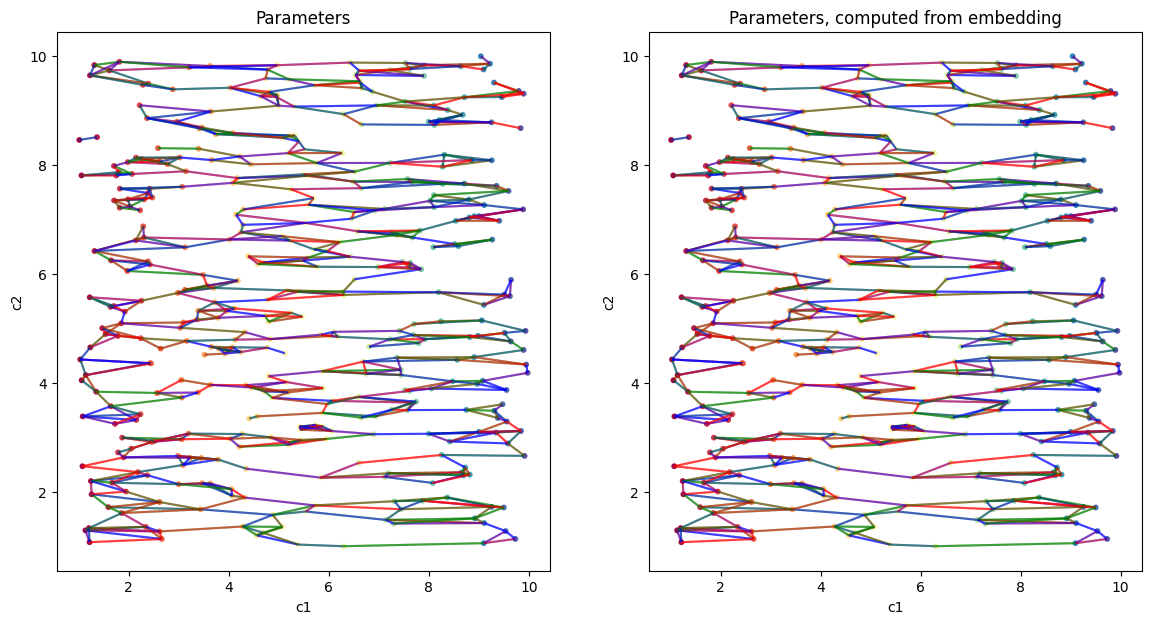

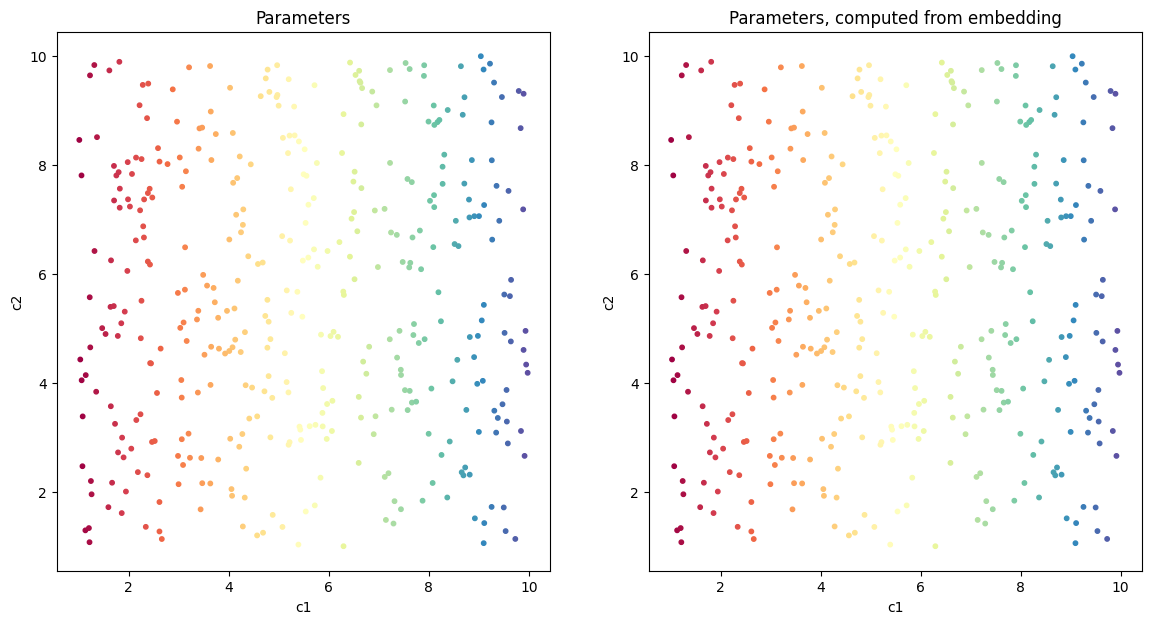

In [6]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [7]:
mcu_experiments = MCUexperiments(mcu_model)
k=5
seed = 153
pieces = 8
test_size = 50
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt=figure_point_cnt, k=k, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed = seed)

Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [2.16996019 1.58642792], x_err = 0.02998101061423309
x_real = [2.05207612 1.61205453]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [1.71599012 1.97474264], x_err = 0.013018182005865953
x_real = [1.12485394 1.96367171]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [1.90701899 2.12774365], x_err = 0.02127202767046102
x_real = [1.42992687 2.06864192]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [1.99285097 1.68405855], x_err = 0.03547320804540999
x_real = [1.43374455 1.65380284]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [1.85851312 1.24186187], x_err = 0.024945612827503127
x_real = [2.03546739 1.00922806]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [1.86145511 1.24377989], x_err = 0.025691753394611605
x_real = [2.09425758 1.26271899]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [1.71617466 1.97408

In [8]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt, noise_level, pieces_cnt=pieces, test_data_size=test_size, same_value=False, baseline=True, seed = seed)

-----------
x_opt  = [1.85754514 1.6099475 ], x_err = 1.6536821472771304e-08
x_real = [2.05207612 1.61205453]
-----------
x_opt  = [1.25473434 1.95487964], x_err = 4.304334327670855e-11
x_real = [1.12485394 1.96367171]
-----------
x_opt  = [1.94144905 2.00554066], x_err = 6.495430163692343e-07
x_real = [1.42992687 2.06864192]
-----------
x_opt  = [1.59074935 1.71832617], x_err = 1.547023383602753e-07
x_real = [1.43374455 1.65380284]
-----------
x_opt  = [1.21319188 1.07544796], x_err = 1.1717752897740265e-06
x_real = [2.03546739 1.00922806]
-----------
x_opt  = [2.61214082 1.27265195], x_err = 3.7849332277198173e-07
x_real = [2.09425758 1.26271899]
-----------
x_opt  = [1.25473434 1.95487964], x_err = 1.8264014370276224e-09
x_real = [1.08961815 1.94464788]
-----------
x_opt  = [1.25473434 1.95487964], x_err = 2.058514528129462e-09
x_real = [1.42664815 1.94777   ]
-----------
x_opt  = [1.21319188 1.07544796], x_err = 2.6334939470656303e-08
x_real = [1.43041938 1.09968526]
-----------
x_

In [9]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/orig_roll.pkl', 'wb') as f:
    pickle.dump(data, f)

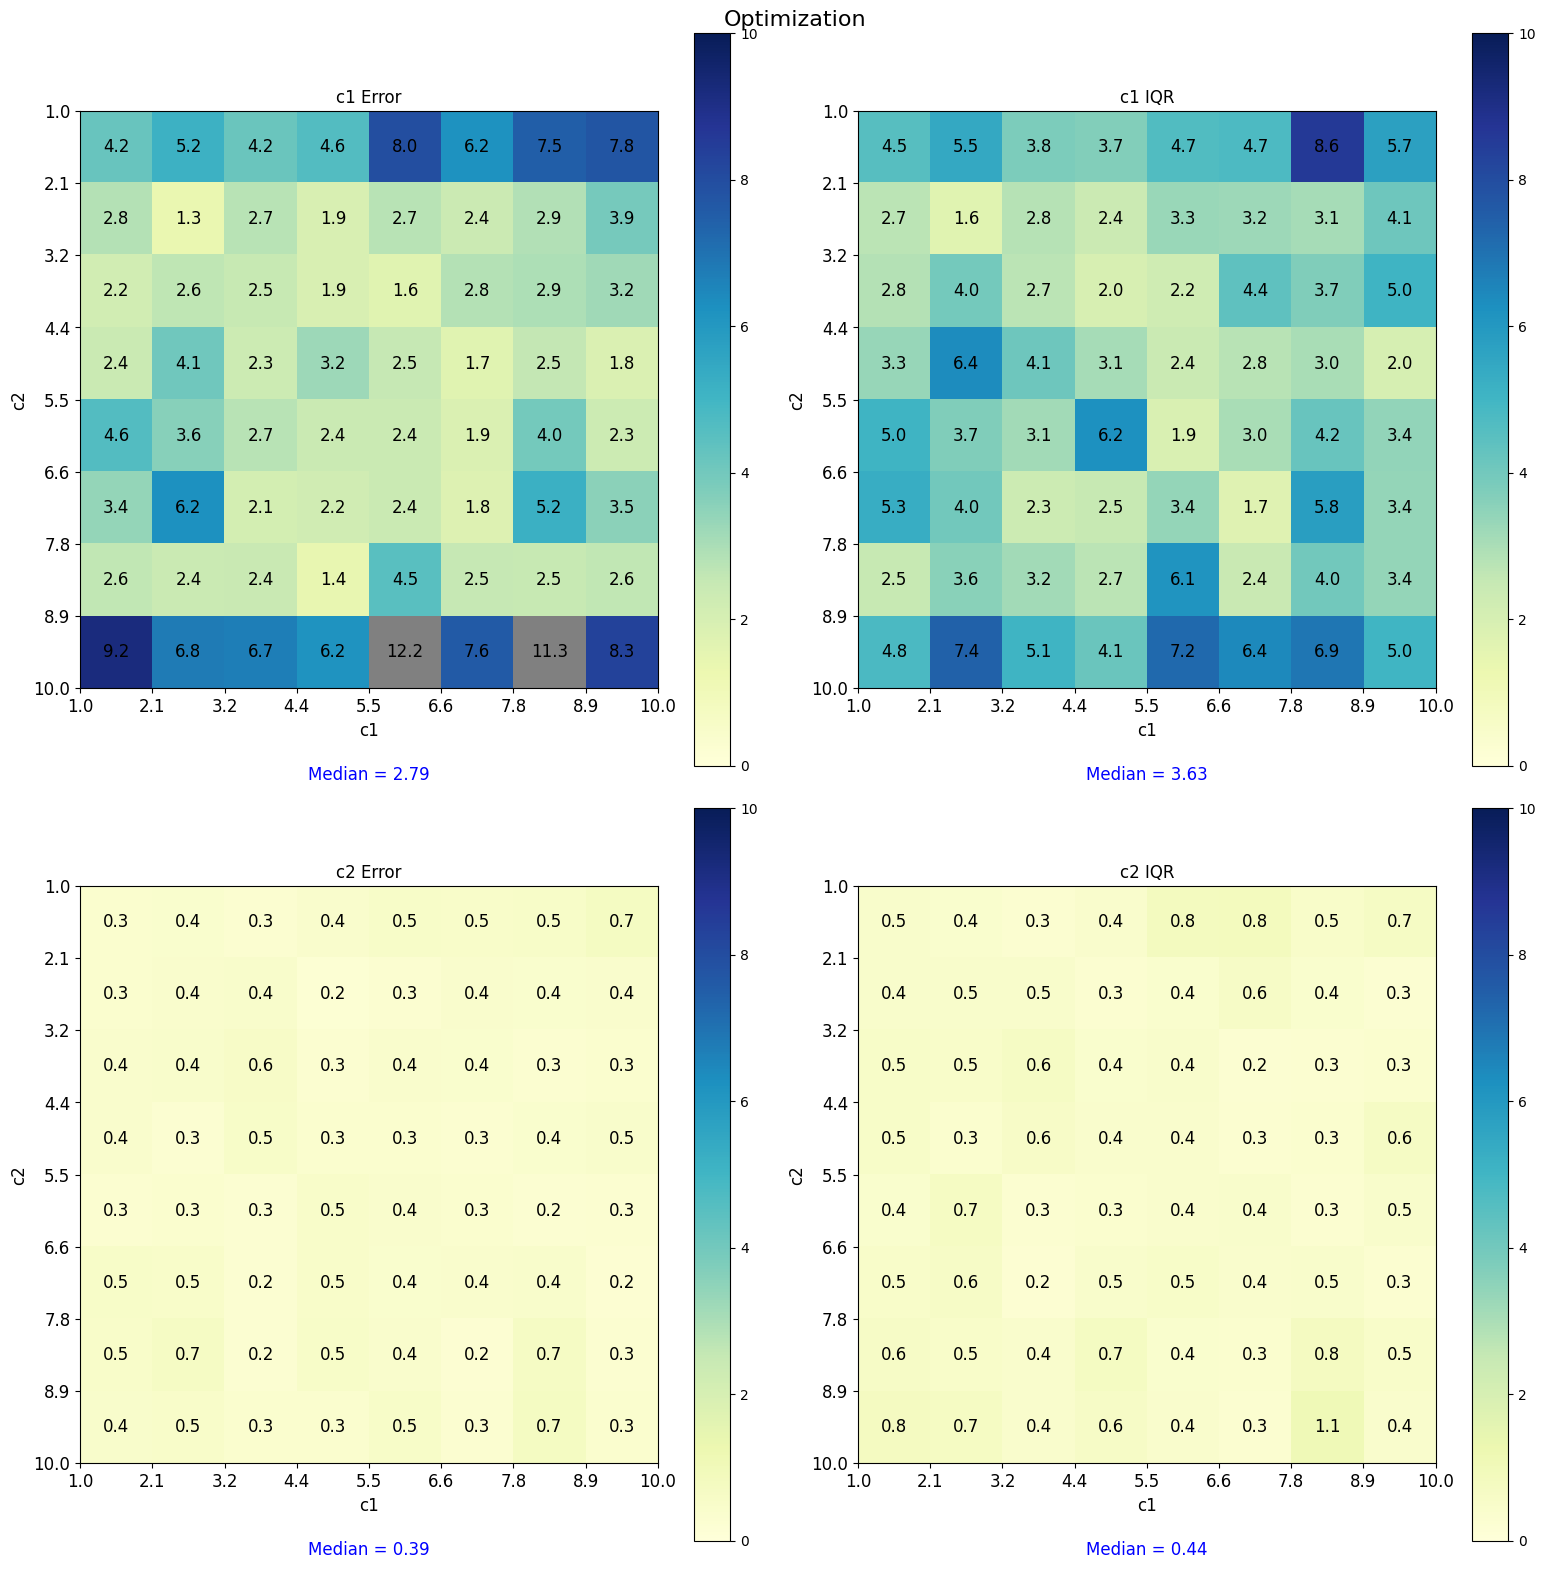

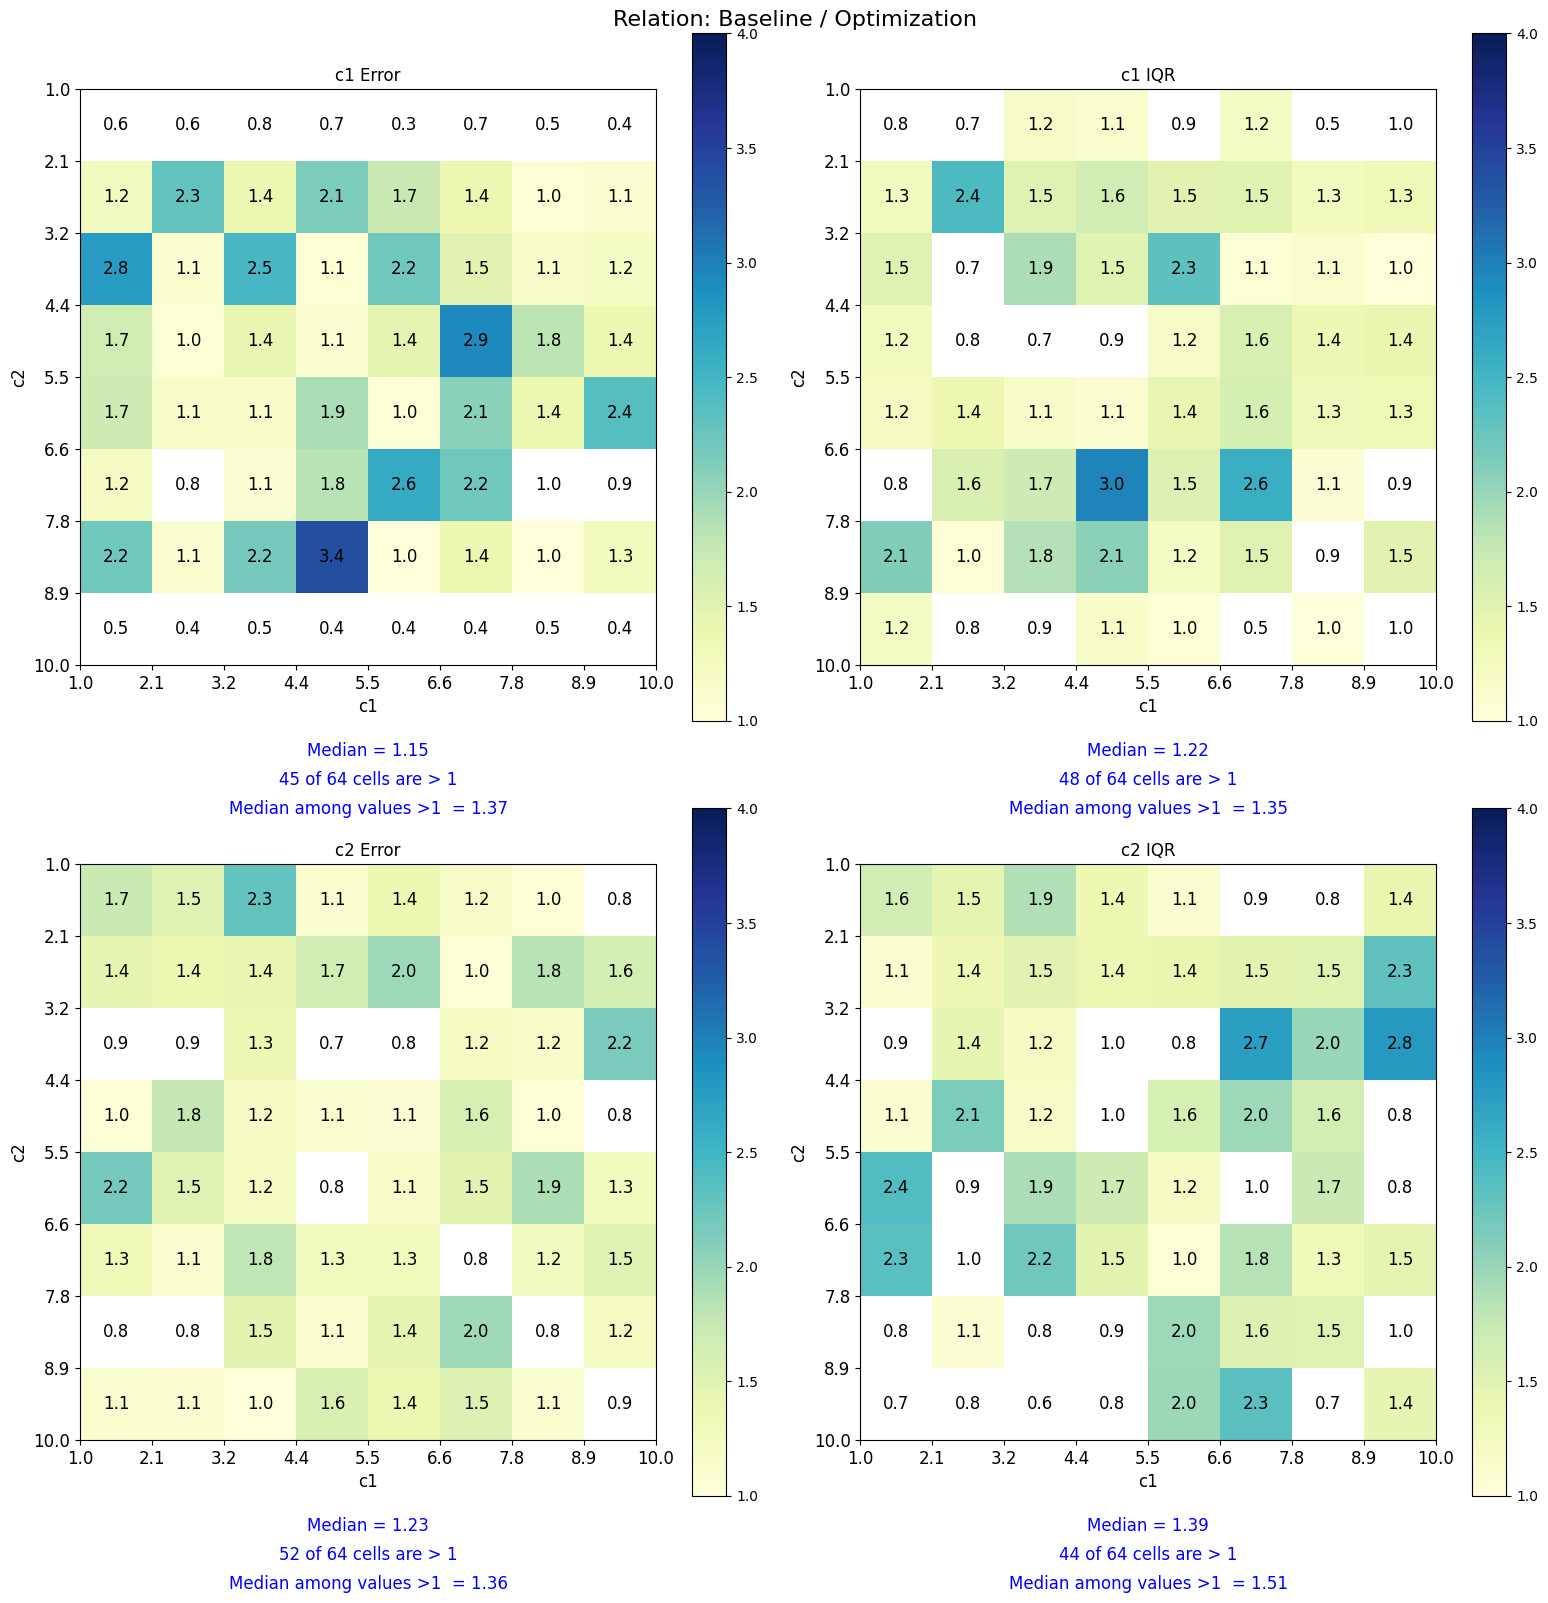

In [12]:
heatmap_lw=0
heatmap_up = 10
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_roll.png", title="Optimization", lw=heatmap_lw, up=heatmap_up)

mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_roll_rel.png", title="Relation: Baseline / Optimization", lw=1, up=4, count_greater_than=1)

0.7380746472339581 10.108697970178838 1.0108997193415474 10.11956235678782


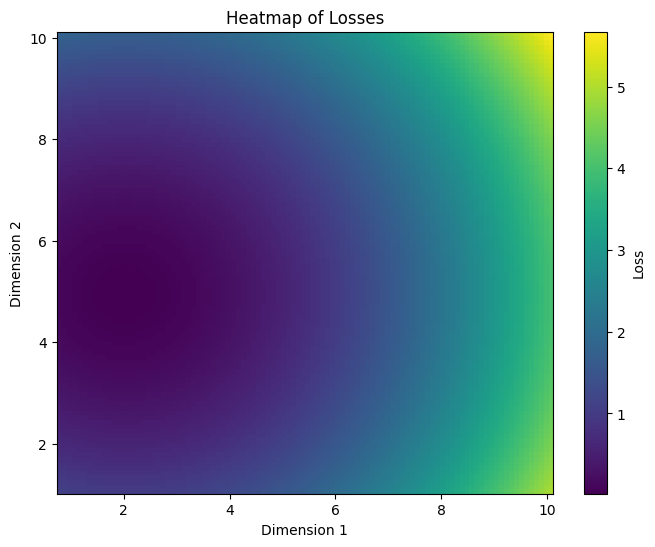

Finding neighbors: 3 ms , optimization: 157 ms
x_opt = [1.98243201 4.94805144], x_err = 0.017523853994236786
x_real = [2 5]
0.7380746472339581 10.108697970178838 1.0108997193415474 10.11956235678782


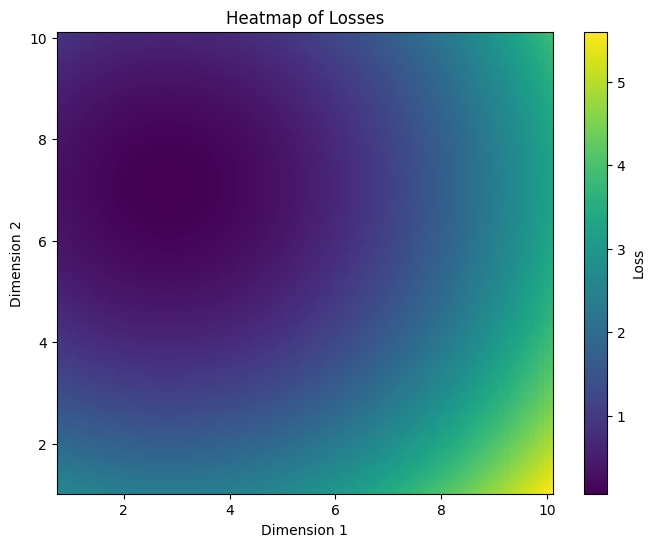

Finding neighbors: 3 ms , optimization: 155 ms
x_opt = [2.79538758 7.08058997], x_err = 0.06286328189595349
x_real = [3 7]
0.7380746472339581 10.108697970178838 1.0108997193415474 10.11956235678782


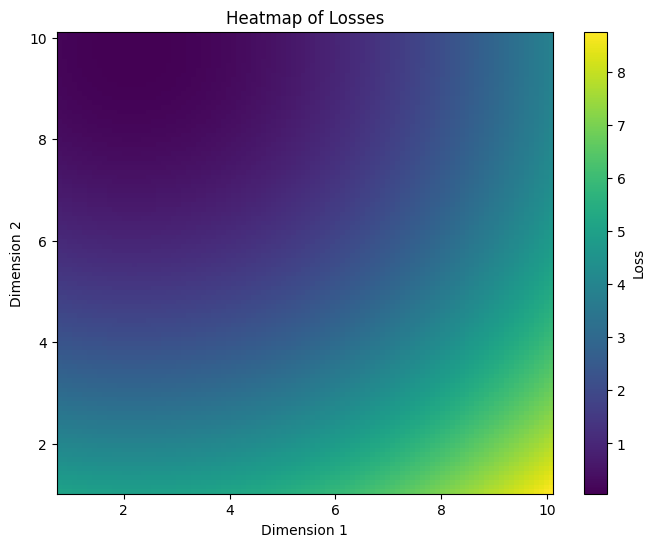

Finding neighbors: 3 ms , optimization: 166 ms
x_opt = [2.12832218 9.78776119], x_err = 0.053278559616785036
x_real = [ 1 10]


In [26]:
test_control_vars = np.array([[2, 5], [3, 7], [1, 10]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, roll_generator.generate_swiss_roll,
                                         
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=5)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")